# Indian Candidates for General Election 2019

With over 600 Million voters voting for 8500+ candidates across 543 constituencies, the general elections in the world's largest democracy are a potential goldmine of data. While there are existing separate datasets about the votes each candidate received and the personal information of each candidate, there was no comprehensive dataset that included both these information. Thus, this dataset will provide more usability than most existing datasets in this domain.

DataSet Link : https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019

**Importing important Libraries and Loading Dataset.**

Numpy:- In this Project we are using 'Numpy' Library for Numbers Operation here.

Pandas:- In this Project we are using 'Pandas' Library for EDA and data related task.

Matplotlib:- 'Matplotlib' we are using for Visualization Purpose.

Seaborn:- With the help of 'Seaborn' we can visualize the data in advanced form.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loding Dataset
df = pd.read_csv('Indian_Election .csv')
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [3]:
#Deleting unnessasary column
del df['ASSETS']
del df['LIABILITIES']
del df['EDUCATION']
del df['CRIMINAL\nCASES']

In [4]:
df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,AGE,CATEGORY,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,ST,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,54.0,ST,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,52.0,ST,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,58.0,SC,644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,43.0,GENERAL,14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,63.0,GENERAL,434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,49.0,GENERAL,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,47.0,GENERAL,138731,216,138947,9.271379,13.302678,1498666


In [5]:
#Filling the Null values
df.SYMBOL.fillna(df.SYMBOL.index[0], inplace=True)
df.GENDER.fillna(df.GENDER.index[0], inplace=True)
df.AGE.fillna(df.AGE.median(), inplace=True)
df.CATEGORY.fillna(df.CATEGORY.index[0], inplace=True)


In [6]:
#Checking the Null values
df.isnull().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                       0
GENDER                                       0
AGE                                          0
CATEGORY                                     0
GENERAL\nVOTES                               0
POSTAL\nVOTES                                0
TOTAL\nVOTES                                 0
OVER TOTAL ELECTORS \nIN CONSTITUENCY        0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    0
TOTAL ELECTORS                               0
dtype: int64

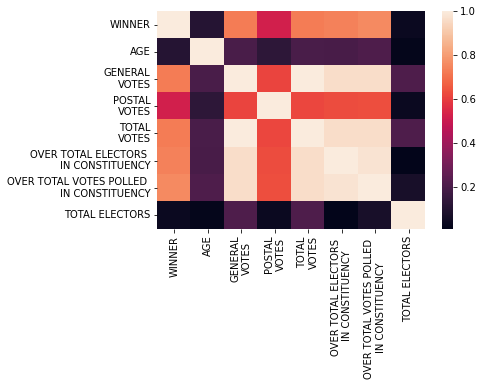

In [7]:
# Checking the Correalation between available column in dataset using heatmap (seaborn).

corr =df.corr()
sns.heatmap(corr)

In [8]:
#Converting categorical data into Numerical data
variable = pd.get_dummies(df.STATE, prefix='STATE')
variable1 = pd.get_dummies(df.CONSTITUENCY, prefix='CONSTITUENCY')
variable2 = pd.get_dummies(df.NAME, prefix='NAME')
variable3 = pd.get_dummies(df.PARTY, prefix='PARTY')
variable4 = pd.get_dummies(df.SYMBOL, prefix='SYMBOL')
variable5 = pd.get_dummies(df.GENDER, prefix='GENDER')
variable6 = pd.get_dummies(df.CATEGORY, prefix='CATEGORY')
New_dataset = pd.concat([variable,variable1,variable2,variable3,variable4,variable5,variable6,  df], axis='columns')


In [9]:
#Droping categorical column
New_dataset.drop('STATE', axis='columns', inplace=True)
New_dataset.drop('CONSTITUENCY', axis='columns', inplace=True)
New_dataset.drop('NAME', axis='columns', inplace=True)
New_dataset.drop('PARTY', axis='columns', inplace=True)
New_dataset.drop('SYMBOL', axis='columns', inplace=True)
New_dataset.drop('GENDER', axis='columns', inplace=True)
New_dataset.drop('CATEGORY', axis='columns', inplace=True)

In [10]:
New_dataset

,STATE_Andaman & Nicobar Islands,STATE_Andhra Pradesh,STATE_Arunachal Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Dadra & Nagar Haveli,STATE_Daman & Diu,STATE_Goa,STATE_Gujarat,STATE_Haryana,STATE_Himachal Pradesh,STATE_Jammu & Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Lakshadweep,STATE_Madhya Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Meghalaya,STATE_Mizoram,STATE_NCT OF Delhi,STATE_Nagaland,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal,CONSTITUENCY_ADILABAD,CONSTITUENCY_AGRA,CONSTITUENCY_AHMADNAGAR,CONSTITUENCY_AHMEDABAD EAST,...,SYMBOL_Scales,SYMBOL_Scissors,SYMBOL_Sewing Machine,SYMBOL_Sitar,SYMBOL_Spade & Stoker,SYMBOL_Spanner,SYMBOL_Spectacles,SYMBOL_Star,SYMBOL_Stethoscope,SYMBOL_Table,SYMBOL_Table Lamp,SYMBOL_Telephone,SYMBOL_Television,SYMBOL_Tent,SYMBOL_Throwing a Javelin,SYMBOL_Tiller,SYMBOL_Tractor Chalata Kisan,SYMBOL_Triangle,SYMBOL_Truck,SYMBOL_Two Leaves,SYMBOL_Tyres,SYMBOL_Umbrella,SYMBOL_Walking Stick,SYMBOL_Water Melon,SYMBOL_Whistle,GENDER_0,GENDER_FEMALE,GENDER_MALE,CATEGORY_0,CATEGORY_GENERAL,CATEGORY_SC,CATEGORY_ST,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,52.0,376892,482,377374,25.330684,35.468248,1489790
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,54.0,318665,149,318814,21.399929,29.964370,1489790
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,52.0,314057,181,314238,21.092771,29.534285,1489790
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,52.0,13030,6,13036,0.875023,1.225214,1489790
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,58.0,644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,43.0,14661,25,14686,0.766419,1.250060,1916185
2259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,63.0,434066,178,434244,28.975369,41.574183,1498666
2260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,49.0,427900,115,428015,28.559732,40.977823,1498666
2261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,47.0,138731,216,138947,9.271379,13.302678,1498666


In [11]:
# Seprating X fetures
X = New_dataset.iloc[:,:-1]
X

,STATE_Andaman & Nicobar Islands,STATE_Andhra Pradesh,STATE_Arunachal Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Dadra & Nagar Haveli,STATE_Daman & Diu,STATE_Goa,STATE_Gujarat,STATE_Haryana,STATE_Himachal Pradesh,STATE_Jammu & Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Lakshadweep,STATE_Madhya Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Meghalaya,STATE_Mizoram,STATE_NCT OF Delhi,STATE_Nagaland,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal,CONSTITUENCY_ADILABAD,CONSTITUENCY_AGRA,CONSTITUENCY_AHMADNAGAR,CONSTITUENCY_AHMEDABAD EAST,...,SYMBOL_Saw,SYMBOL_Scales,SYMBOL_Scissors,SYMBOL_Sewing Machine,SYMBOL_Sitar,SYMBOL_Spade & Stoker,SYMBOL_Spanner,SYMBOL_Spectacles,SYMBOL_Star,SYMBOL_Stethoscope,SYMBOL_Table,SYMBOL_Table Lamp,SYMBOL_Telephone,SYMBOL_Television,SYMBOL_Tent,SYMBOL_Throwing a Javelin,SYMBOL_Tiller,SYMBOL_Tractor Chalata Kisan,SYMBOL_Triangle,SYMBOL_Truck,SYMBOL_Two Leaves,SYMBOL_Tyres,SYMBOL_Umbrella,SYMBOL_Walking Stick,SYMBOL_Water Melon,SYMBOL_Whistle,GENDER_0,GENDER_FEMALE,GENDER_MALE,CATEGORY_0,CATEGORY_GENERAL,CATEGORY_SC,CATEGORY_ST,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,52.0,376892,482,377374,25.330684,35.468248
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,54.0,318665,149,318814,21.399929,29.964370
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,52.0,314057,181,314238,21.092771,29.534285
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,52.0,13030,6,13036,0.875023,1.225214
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,58.0,644459,2416,646875,33.383823,56.464615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,43.0,14661,25,14686,0.766419,1.250060
2259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,63.0,434066,178,434244,28.975369,41.574183
2260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,49.0,427900,115,428015,28.559732,40.977823
2261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,47.0,138731,216,138947,9.271379,13.302678


In [12]:
# Seprating y features
y = New_dataset.iloc[:,-1]
y

0       1489790
1       1489790
2       1489790
3       1489790
4       1937690
         ...   
2258    1916185
2259    1498666
2260    1498666
2261    1498666
2262    1498666
Name: TOTAL ELECTORS, Length: 2263, dtype: int64

In [13]:
# Importing train_test_split using Sklearn for split training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

## **RandomForestClassifier**

In [14]:
# Importing LogisticRegression from sklearn and creating a variable.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [15]:
# Fitting model.

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
# Predicting the model on test dataset.

y_pred = model.predict(X_test)

In [17]:
# checking the accuracy score.

model.score(X_test,y_test)

0.8719646799116998

## **DecisionTreeClassifier**

In [18]:
# Importing 'Decision Tree' from sklearn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
# Creating a Model in Decision Tree and then fitting it.

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
# Checking the accuracy score on Test Data.

model.score(X_test, y_test)

0.8565121412803532

**As we have use few algorithm here. So you can see the better accuracy level according to algorithm below:**

RandomForestClassifier :- As you have seen above in 'RandomForestClassifier' it's providing accuracy level = 88%.

DecisionTreeClassifier :- As you have seen above in 'DecisionTreeClassifier' it's providing accuracy level = 86%.

Note:- So as it clearly mentioned that we are getting higher accuracy level from 'RandomForestClassifier'. So we'll use it for our Model.